In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

data=pd.read_csv("/content/drive/MyDrive/Machine learning/IBM DATA SCIENCE/Data Analytics with python/My Notebooks/imports-85.data", names=headers)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
data.replace("?",np.nan,inplace=True)

In [5]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64



> Data Wrangling (handling ,missing values and formatting)



In [6]:
avg_norm_loss = data["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [7]:
data["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [8]:
avg_bore=data['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [9]:
data["bore"].replace(np.nan, avg_bore, inplace=True)

In [10]:
data.stroke.info()
avg_stroke=data.stroke.astype('float').mean(axis=0)
print("Average of stroke:",avg_stroke)

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: stroke
Non-Null Count  Dtype 
--------------  ----- 
201 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
Average of stroke: 3.255422885572139


In [11]:
data.stroke=data.stroke.replace(np.nan,avg_stroke)

In [12]:
avg_horsepower = data['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


In [13]:
data['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [14]:
avg_peakrpm=data['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


In [15]:
data['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [16]:
data['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [17]:
data['num-of-doors'].value_counts().idxmax()

'four'

In [18]:
#replace the missing 'num-of-doors' values by the most frequent 
data["num-of-doors"].replace(np.nan, "four", inplace=True)

In [19]:
# # simply drop whole row with NaN in "price" column
# df.dropna(subset=["price"], axis=0, inplace=True)

# # or

data.price.dropna(axis=0,inplace=True)

> Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.

In [20]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)   #standardization
data["highway-mpg"] = 235/data["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
data.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# check your transformed data 
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,8.703704,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,8.703704,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,9.038462,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,7.833333,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,10.681818,17450


> Normalization

Types of normalization: <br>
1. Simple Normalisation <br>
2. Z-score <br>
3. MinMAx<br>
4. Decimal<br>

In [21]:
data.height=data.height/data.height.max()

<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>


In [22]:
#converting the column to a proper format first and then binning will be applied
data["horsepower"]=data["horsepower"].astype(int, copy=True)

<Axes: xlabel='horsepower', ylabel='Count'>

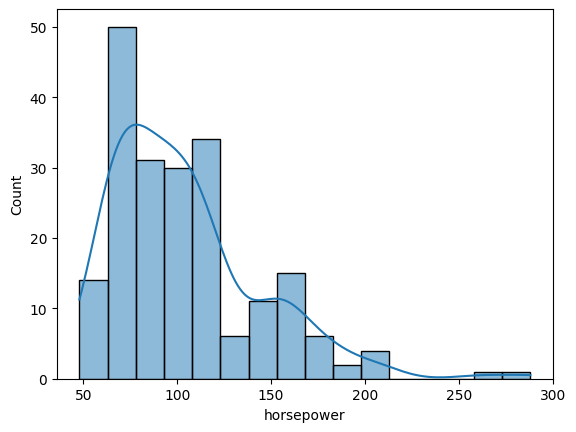

In [23]:
#plotting histogtram
sns.histplot(data=data,x="horsepower",kde=True)

In [24]:
bins = np.linspace(min(data["horsepower"]), max(data["horsepower"]), 4)
bins

array([ 48., 128., 208., 288.])

In [25]:
group=["low","medium","high"]
data["horsepower_binned"]=pd.cut(data.horsepower,bins,labels=group,include_lowest=True)

In [26]:
data[["horsepower","horsepower_binned"]].head()

,horsepower,horsepower_binned
0,111,low
1,111,low
2,154,medium
3,102,low
4,115,low


<Axes: xlabel='horsepower_binned', ylabel='Count'>

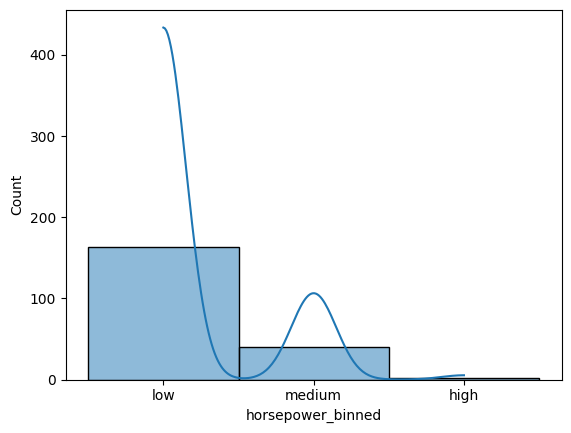

In [27]:
#plotting histogtram
sns.histplot(data=data,x="horsepower_binned",kde=True)

<h2>Part-3 : Exploratory Data Analysis</h2>

In [30]:
data.dtypes

symboling               int64
normalized-losses      object
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                   object
stroke                 object
compression-ratio     float64
horsepower              int64
peak-rpm               object
city-mpg                int64
highway-L/100km       float64
price                  object
horsepower_binned    category
dtype: object

In [49]:
data["peak-rpm"]=data["peak-rpm"].astype("float64")
data["bore"]=data["bore"].astype("float64")
data["stroke"]=data["stroke"].astype("float64")
data["engine-size"]=data["engine-size"].astype("int64")
data["price"]=data["price"].astype("float64")

In [50]:
data.corr()

<ipython-input-50-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071380,0.273679,-0.035823,-0.030190,-0.082391
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351985,-0.360704,-0.470414,0.578128,0.584642
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554408,-0.287031,-0.670909,0.711597,0.690628
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642176,-0.219859,-0.642704,0.728044,0.751265
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110114,-0.320602,-0.048640,0.085892,0.135486
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750973,-0.266283,-0.757414,0.836742,0.834415
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810705,-0.244599,-0.653658,0.777077,0.872335
bore,-0.130083,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575707,-0.254761,-0.584508,0.551943,0.543155
stroke,-0.008689,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088133,-0.066844,-0.042179,0.055433,0.082269
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005201,0.186105,1.000000,-0.205717,-0.435936,0.324701,-0.223411,0.071107


In [51]:
data[["bore","stroke","compression-ratio","horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055909,0.005201,0.575707
stroke,-0.055909,1.000000,0.186105,0.088133
compression-ratio,0.005201,0.186105,1.000000,-0.205717
horsepower,0.575707,0.088133,-0.205717,1.000000


(0.0, 53234.638438415364)

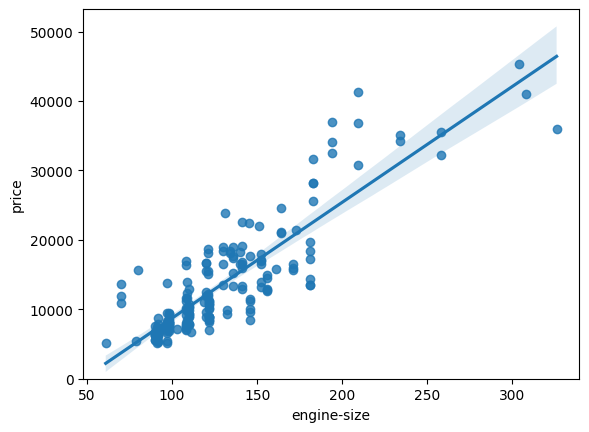

In [52]:
sns.regplot(x="engine-size", y="price", data=data)
plt.ylim(0,)

In [54]:
data[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


(0.0, 47712.51131967946)

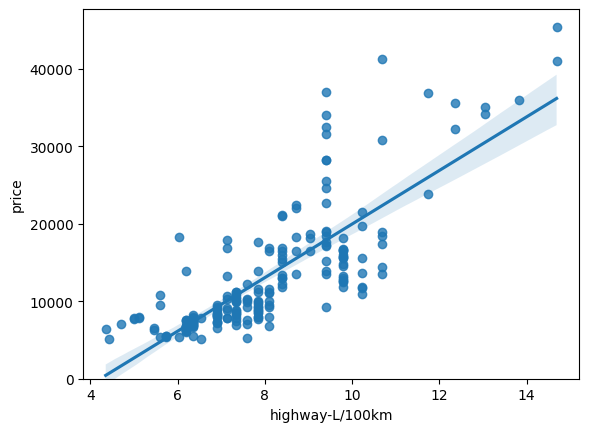

In [59]:
sns.regplot(x="highway-L/100km", y="price", data=data)
plt.ylim(0,)

In [60]:
data[['highway-L/100km', 'price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

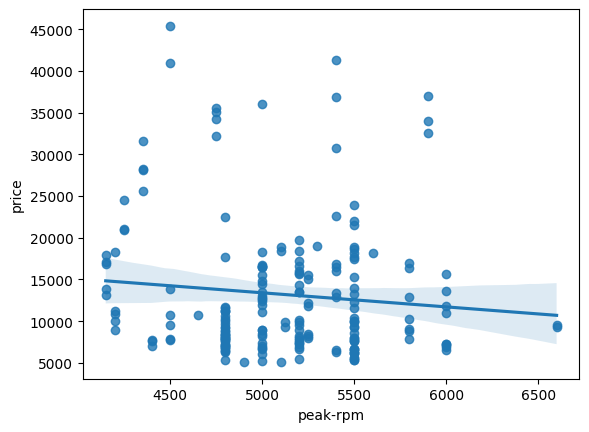

In [62]:
sns.regplot(x="peak-rpm", y="price", data=data)

In [63]:
data[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [65]:
data[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


<Axes: xlabel='stroke', ylabel='price'>

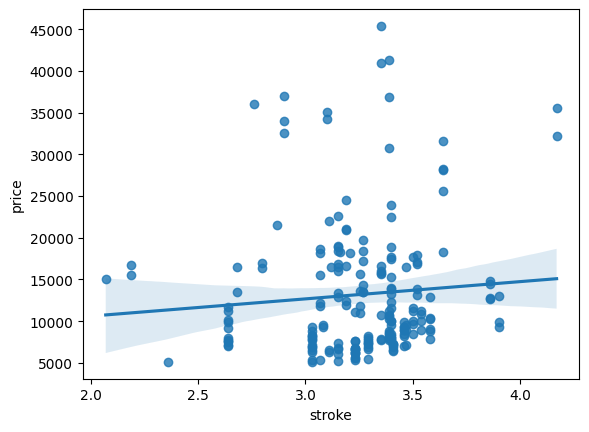

In [66]:
sns.regplot(x="stroke",y="price",data=data)

<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


<Axes: xlabel='body-style', ylabel='price'>

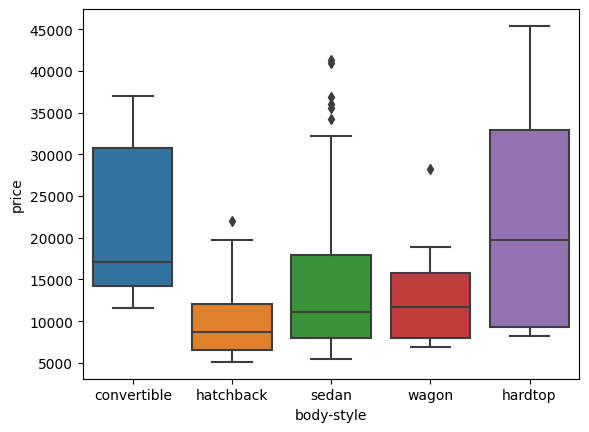

In [68]:
sns.boxplot(x="body-style", y="price", data=data)

<Axes: xlabel='engine-location', ylabel='price'>

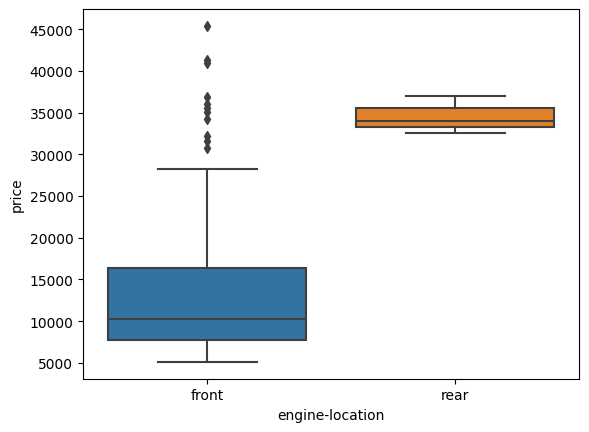

In [69]:
sns.boxplot(x="engine-location", y="price", data=data)

<Axes: xlabel='drive-wheels', ylabel='price'>

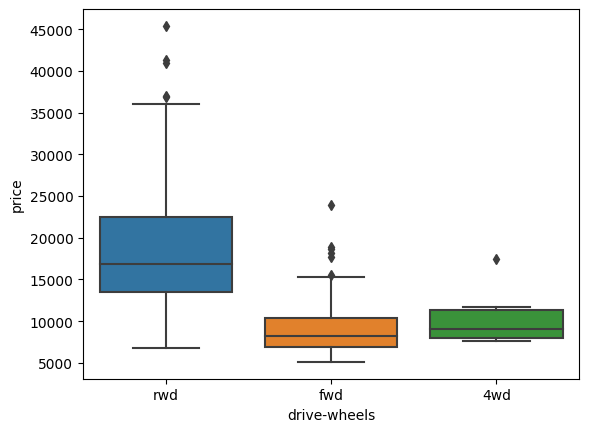

In [71]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=data)

<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


In [72]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,0.898409,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.369458,25.219512,8.034347,13207.129353
std,1.245307,6.021776,12.337289,2.145204,0.040862,520.680204,41.642693,0.270844,0.313597,3.972040,39.519219,476.979093,6.542142,1.849782,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,0.869565,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,7.833333,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,0.928094,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,14.687500,45400.000000


In [73]:
data.describe(include=['object'])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205.0,205,205,205,205,205,205,205,205,205,205
unique,52.0,22,2,2,2,5,3,2,7,7,8
top,122.0,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,41.0,32,185,168,116,96,120,202,148,159,94


<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df['drive-wheels']</code>, not two brackets <code>df[['drive-wheels']]</code>.</p>


In [74]:
data['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

We can convert the series to a dataframe as follows:


In [75]:
data['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,120
rwd,76
4wd,9


In [76]:
drive_wheels_counts = data['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,120
rwd,76
4wd,9


In [77]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,120
rwd,76
4wd,9


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.</p>


In [78]:
data['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>

<p>We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".</p>


In [79]:
df_group_one = data[['drive-wheels','body-style','price']]